In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(150,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.h5',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=15,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/15
34/34 [==============================] - 46s 1s/step - loss: 0.6874 - accuracy: 0.5504 - val_loss: 0.6428 - val_accuracy: 0.5602
Epoch 2/15
34/34 [==============================] - 42s 1s/step - loss: 0.5742 - accuracy: 0.6937 - val_loss: 0.4443 - val_accuracy: 0.8045
Epoch 3/15
34/34 [==============================] - 42s 1s/step - loss: 0.3891 - accuracy: 0.8473 - val_loss: 0.3359 - val_accuracy: 0.8459
Epoch 4/15
34/34 [==============================] - 42s 1s/step - loss: 0.3270 - accuracy: 0.8737 - val_loss: 0.2545 - val_accuracy: 0.9173
Epoch 5/15
34/34 [==============================] - 40s 1s/step - loss: 0.1813 - accuracy: 0.9378 - val_loss: 0.2063 - val_accuracy: 0.9173
Epoch 6/15
34/34 [==============================] - 41s 1s/step - loss: 0.1391 - accuracy: 0.9529 - val_loss: 0.4952 - val_accuracy: 0.8008
Epoch 7/15
34/34 [==============================] - 39s 1s/step - loss: 0.1950 - accuracy: 0.9284 - val_loss: 0.2471 - val_accuracy: 0.9286
Epoch 8/15
34/34 [==

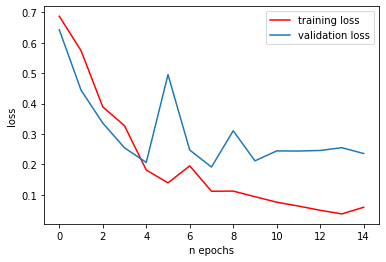

In [12]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('n epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

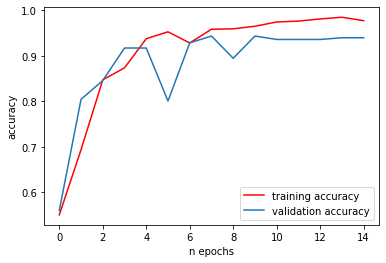

In [13]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('n epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [7]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 2s 386ms/step - loss: 0.1601 - accuracy: 0.9662
[0.16013269126415253, 0.9662162065505981]
